In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

import psutil

In [0]:
def himmelblau_plotting(x, y):
  results = []
  for i in range(len(x)):
    results.append((x[i]**2 + y[i] - 11)**2 + (x[i] + y[i]**2 - 7)**2)
  return np.asarray(results)

def himmelblau(x, y):
  return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

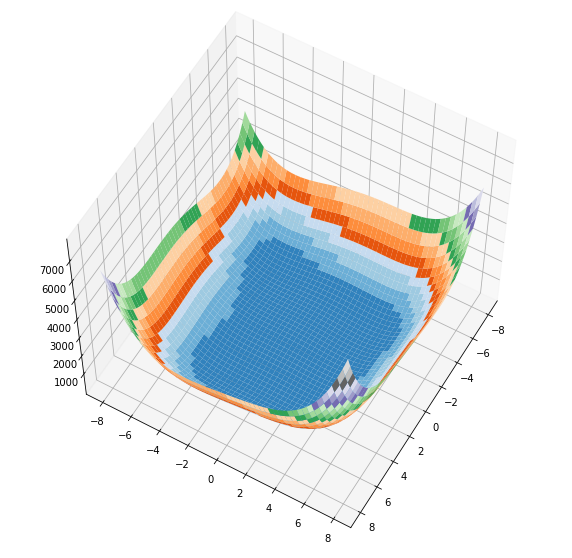

In [0]:

x = np.linspace(-8, 8, 1000)
y = np.linspace(-8, 8, 1000)

X, Y = np.meshgrid(x, y)

Z = himmelblau_plotting(X, Y)

fig = plt.figure(figsize = [10, 10])
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='tab20c')
ax.view_init(elev=59., azim=30)

In [0]:

# Convert binary encoding to integer. Serves as an objective function, idea is that higher integer values are automatically better
def binary_to_integer(arr):
  powers = len(arr) - 1
  result = 0
  for i in arr:
    result += i * (2**powers)
    powers -= 1
  return result
  
# Select a single crossover point from uniform distribution
def select_crossover(lb, ub):
  # Must pass in ub as len(arr) - 1
  return int(np.random.uniform(lb, ub))

# Select a number of points within the chromosome to be flipped
def select_mutation_points(lb, ub, num_mutation):
   return np.sort(np.random.uniform(lb, ub, num_mutation).astype(int))

test = [1, 1, 1, 1, 1, 1, 1, 1]

binary_to_integer(test)

255

In [0]:
print(select_mutation_points(0, 7, 4))

[0 1 3 5]


In [0]:
select_crossover(0, 7)

2

In [0]:
[1, 2] + [5, 2]

[1, 2, 5, 2]

In [0]:
base1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
base2 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

child1 = base1[0:4] + base2[4:]
child2 = base2[0:4] + base1[4:]

print(child1)
print(child2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


In [0]:
child1[0] = 1
print(child1)

[1, 0, 0, 0, 0, 0, 1, 0]


In [0]:
def apply_mutation(child, mutation_points):
  for i in mutation_points:
    if child[i] == 1:
      child[i] = 0
    else:
      child[i] = 1
  return child

apply_mutation(child1, [0, 1, 2, 3])

[0, 1, 1, 1, 0, 0, 1, 0]

In [0]:
def apply_mutation(child, mutation_points):
  for i in mutation_points:
    if child[i] == 1:
      child[i] = 0
    else:
      child[i] = 1
  return child

def generate_population(base1, base2, pop_size, chromosome_size, number_of_mutations):
  population = []
  for i in range(int(pop_size/2)):
    crossover_point = select_crossover(0, chromosome_size)

    mutation_points1 = select_mutation_points(0, chromosome_size, number_of_mutations)
    mutation_points2 = select_mutation_points(0, chromosome_size, number_of_mutations)

    child1 = base1[0:crossover_point] + base2[crossover_point:]
    child2 = base2[0:crossover_point] + base1[crossover_point:]

    child1 = apply_mutation(child1, mutation_points1)
    child2 = apply_mutation(child2, mutation_points2)

    population.append(child1)
    population.append(child2)

  return population

def tournament_selection(population):
  scores = []
  for individual in population:
    scores.append(binary_to_integer(individual))

  winners_idx = np.argpartition(scores, -2)[-2:]
  return [population[winners_idx[0]], population[winners_idx[1]], scores]

def evolution_over_generations(num_generations, pop_size, base1, base2):

  scores_over_time = []
  parent1 = base1
  parent2 = base2
  for i in range(num_generations):
    population = generate_population(parent1, parent2, pop_size, len(base1), 4)
    winners = tournament_selection(population)
    parent1 = winners[0]
    parent2 = winners[1]
    
    scores_over_time.append(np.mean(winners[2]))
    
    # print(scores_over_time)
  
  return [parent1, parent2], scores_over_time


In [0]:
winning_parents, scores = evolution_over_generations(200, 60, base1, base2)

print(winning_parents)
print(scores)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]]
[533945671.3, 2223997958.366667, 3594445134.9333334, 3757700087.05, 3892569973.616667, 3896182815.65, 3830939547.3166666, 3835513634.15, 3918223050.55, 3849355238.25, 3693599462.6833334, 3784231316.4166665, 3820235297.9666667, 3728691964.9166665, 3887789522.3166666, 3808078133.55, 3693666991.3, 3951036927.4166665, 3920628190.3166666, 4081053863.5, 3882132315.9, 3684831666.3166666, 3825185202.5, 3745803363.25, 3944164154.5, 4012858640.7166667, 3726172586.35, 3728173110.6, 4015299968.116667, 3728940336.3333335, 3834591203.0833335, 3819104660.7833333, 3753917056.5, 3935080525.133333, 3845322444.95, 3652930217.766667, 3619415453.4666667, 3802042359.766667, 3780404145.1, 3756507367.25, 3715624074.9166665, 3791645594.016667, 4005545669.866667, 3913214133.6, 3650044037.15, 3713234952.7166667, 380449

In [0]:
print(binary_to_integer(winning_parents[0]))
print(binary_to_integer(winning_parents[1]))

4294938951
4294958831


(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1.]),
 array([24611.63333333, 25041.51571429, 25471.39809524, 25901.28047619,
        26331.16285714, 26761.0452381 , 27190.92761905, 27620.81      ,
        28050.69238095, 28480.5747619 , 28910.45714286, 29340.33952381,
        29770.22190476, 30200.10428571, 30629.98666667, 31059.86904762,
        31489.75142857, 31919.63380952, 32349.51619048, 32779.39857143,
        33209.28095238, 33639.16333333, 34069.04571429, 34498.92809524,
        34928.81047619, 35358.69285714, 35788.5752381 , 36218.45761905,
        36648.34      , 37078.22238095, 37508.1047619 , 37937.98714286,
        38367.86952381, 38797.75190476, 39227.63428571, 39657.51666667]),
 <a list of 35 Patch objects>)

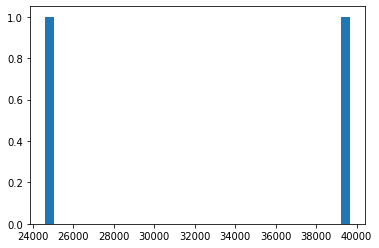

In [0]:

plt.hist(scores, 35)

(array([59., 64., 69., 70., 54., 72., 64., 72., 64., 79., 61., 59., 59.,
        72., 82.]),
 array([7.83170704e-03, 5.40615124e-01, 1.07339854e+00, 1.60618196e+00,
        2.13896537e+00, 2.67174879e+00, 3.20453221e+00, 3.73731562e+00,
        4.27009904e+00, 4.80288246e+00, 5.33566587e+00, 5.86844929e+00,
        6.40123271e+00, 6.93401612e+00, 7.46679954e+00, 7.99958296e+00]),
 <a list of 15 Patch objects>)

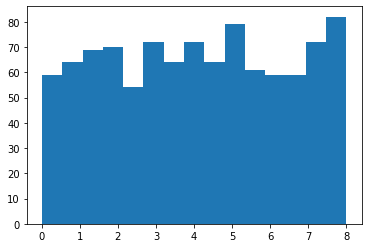

In [0]:
X = np.random.uniform(0, 8, 1000)
plt.hist(X, 15)

In [0]:
!kill -9 -1